In [1]:
! nvidia-smi

Fri Dec 22 15:00:17 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics
from IPython import display
import ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 9.9 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO
from IPython.display import display , Image

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="cLGy7PeEKlkbudyAYJzg")
project = rf.workspace("mary-dhel-moonton-bnc07").project("gender_age")
dataset = project.version(2).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully unins

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.229, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Gender_Age-2 in yolov8:: 100%|██████████| 4970/4970 [00:00<00:00, 9848.43it/s]


In [17]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8n.pt data=/content/Gender_Age-2/data.yaml epochs=80 imgsz=640


/content
Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Gender_Age-2/data.yaml, epochs=80, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

In [19]:
!ls {HOME}/ runs/detect/train2

/content/:
drive  Gender_Age-2  runs  sample_data	yolov8n.pt

runs/detect/train2:
args.yaml					     R_curve.png	  val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv	  val_batch0_pred.jpg
confusion_matrix.png				     results.png	  val_batch1_labels.jpg
events.out.tfevents.1703261365.97a9b02408f9.18550.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					     train_batch1.jpg	  val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch2.jpg	  val_batch2_pred.jpg
labels.jpg					     train_batch9450.jpg  weights
P_curve.png					     train_batch9451.jpg
PR_curve.png					     train_batch9452.jpg


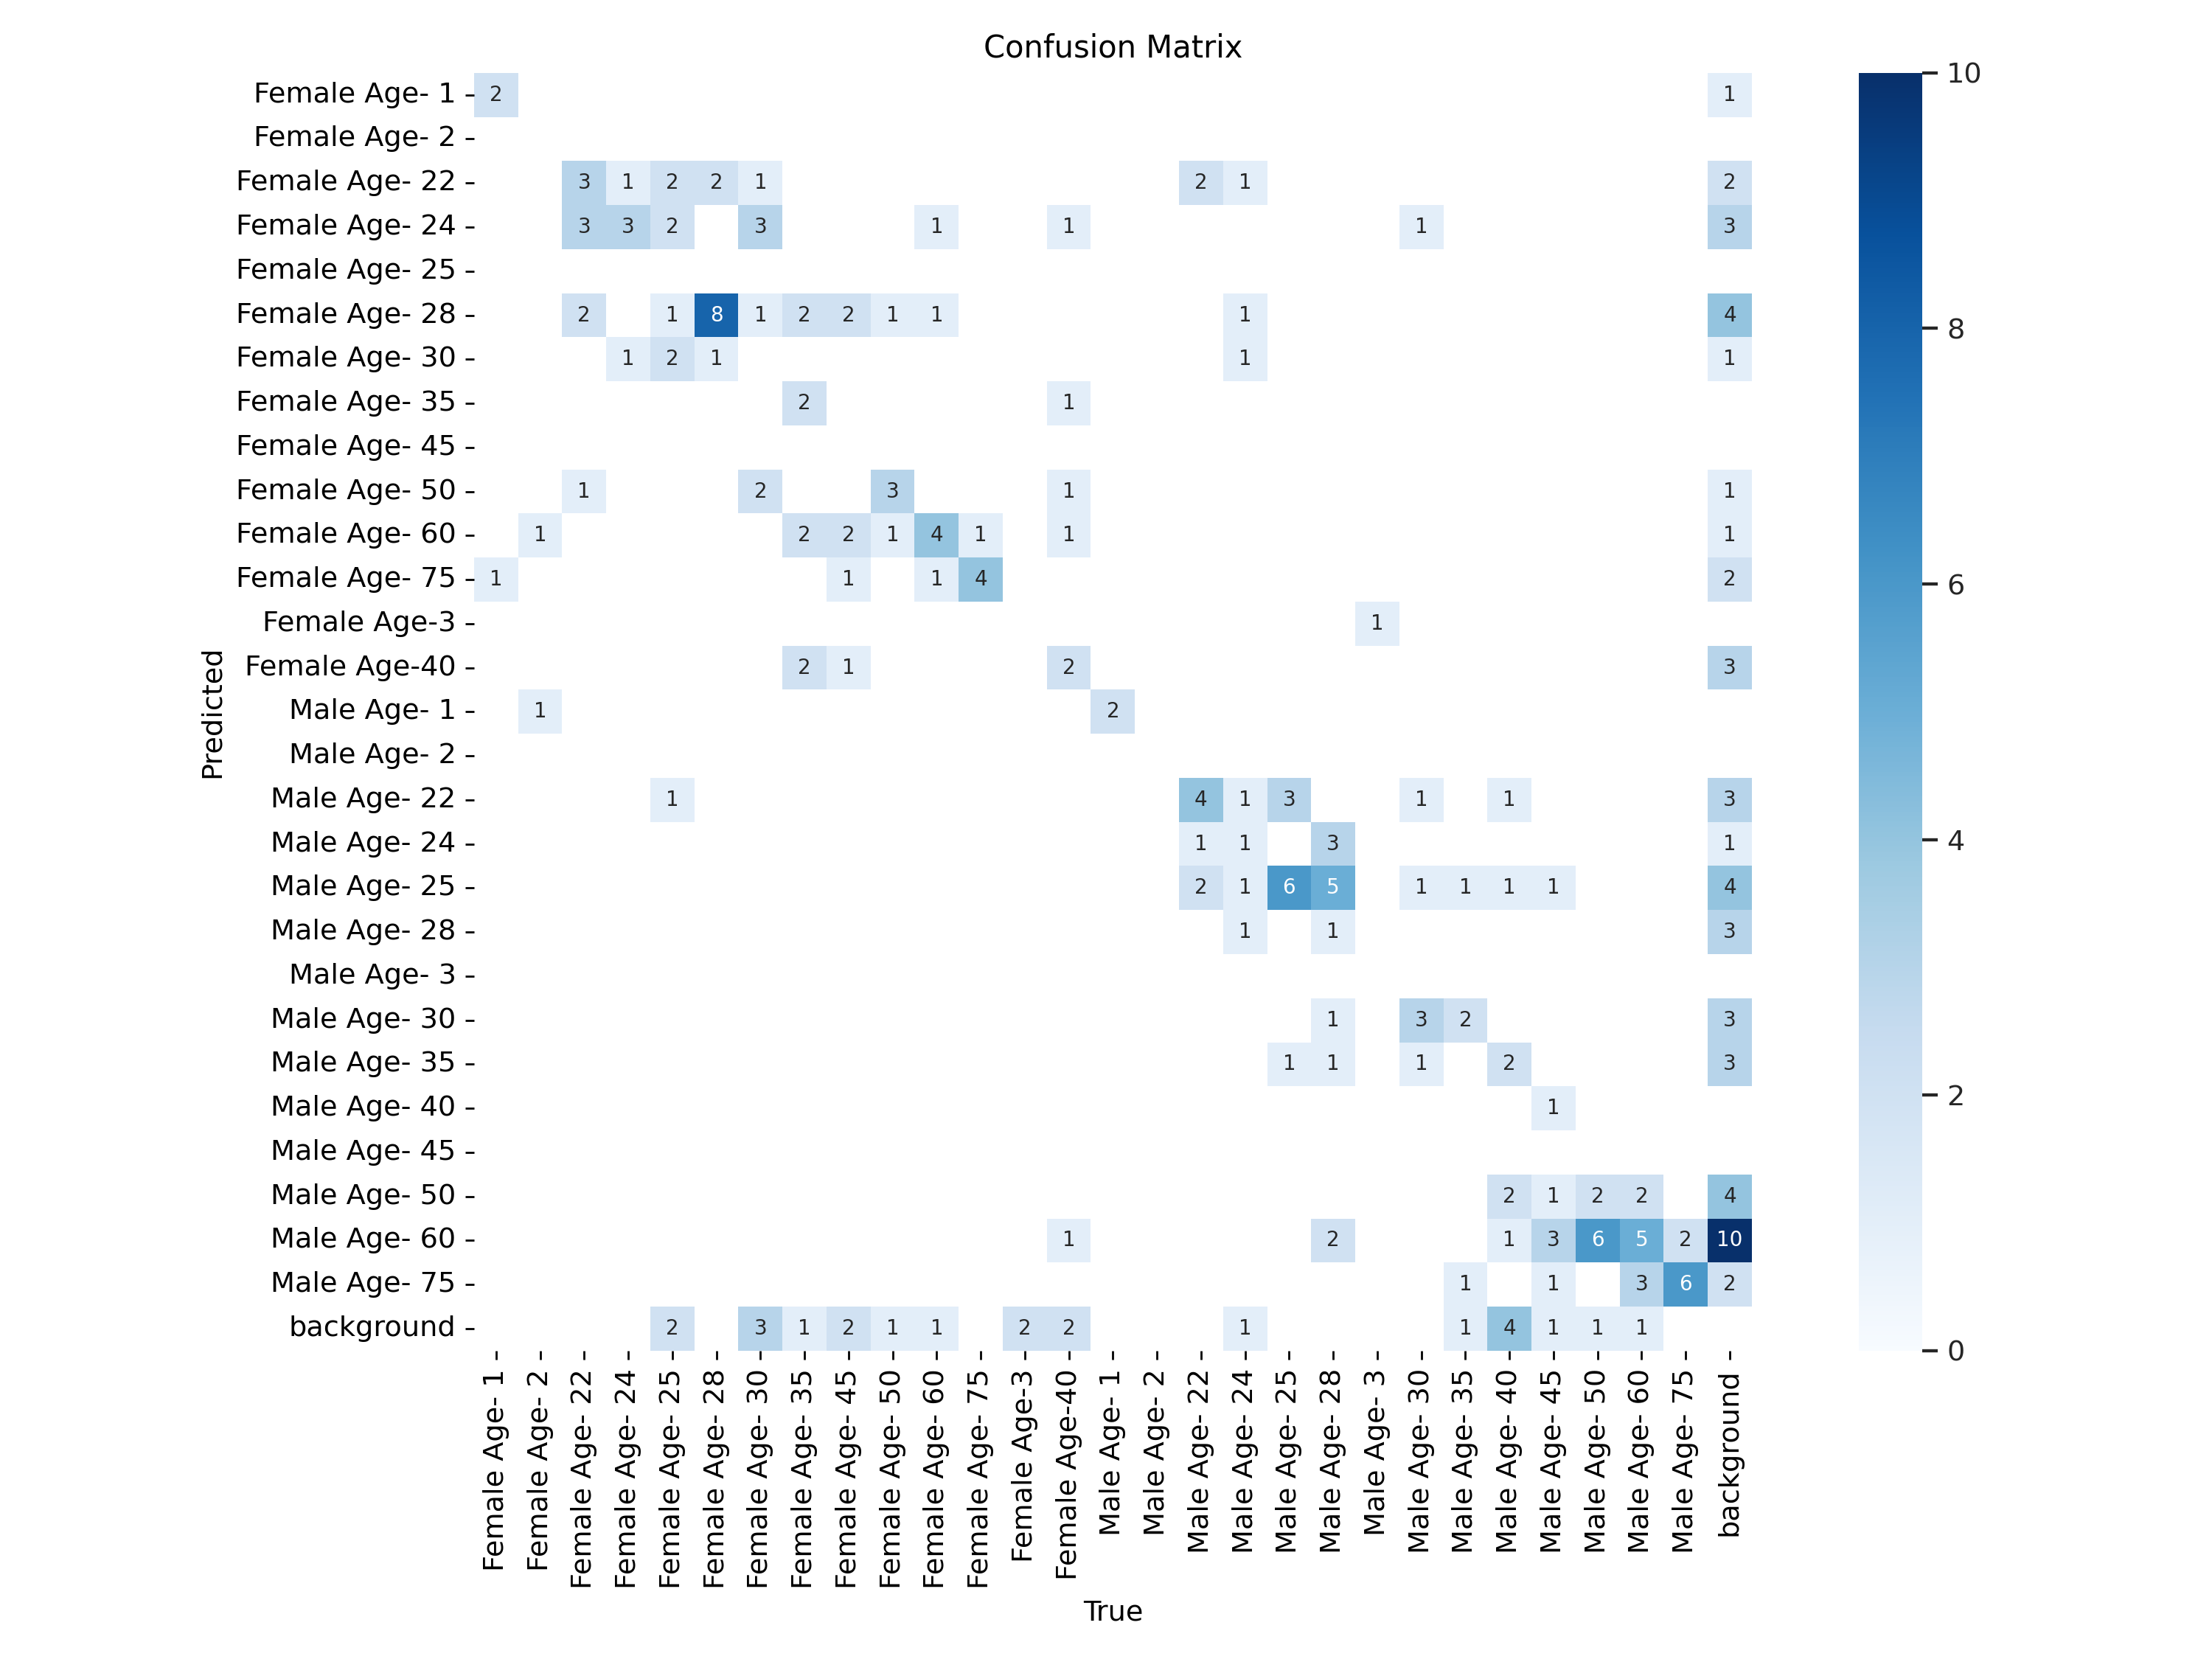

In [20]:
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png' , width=600)

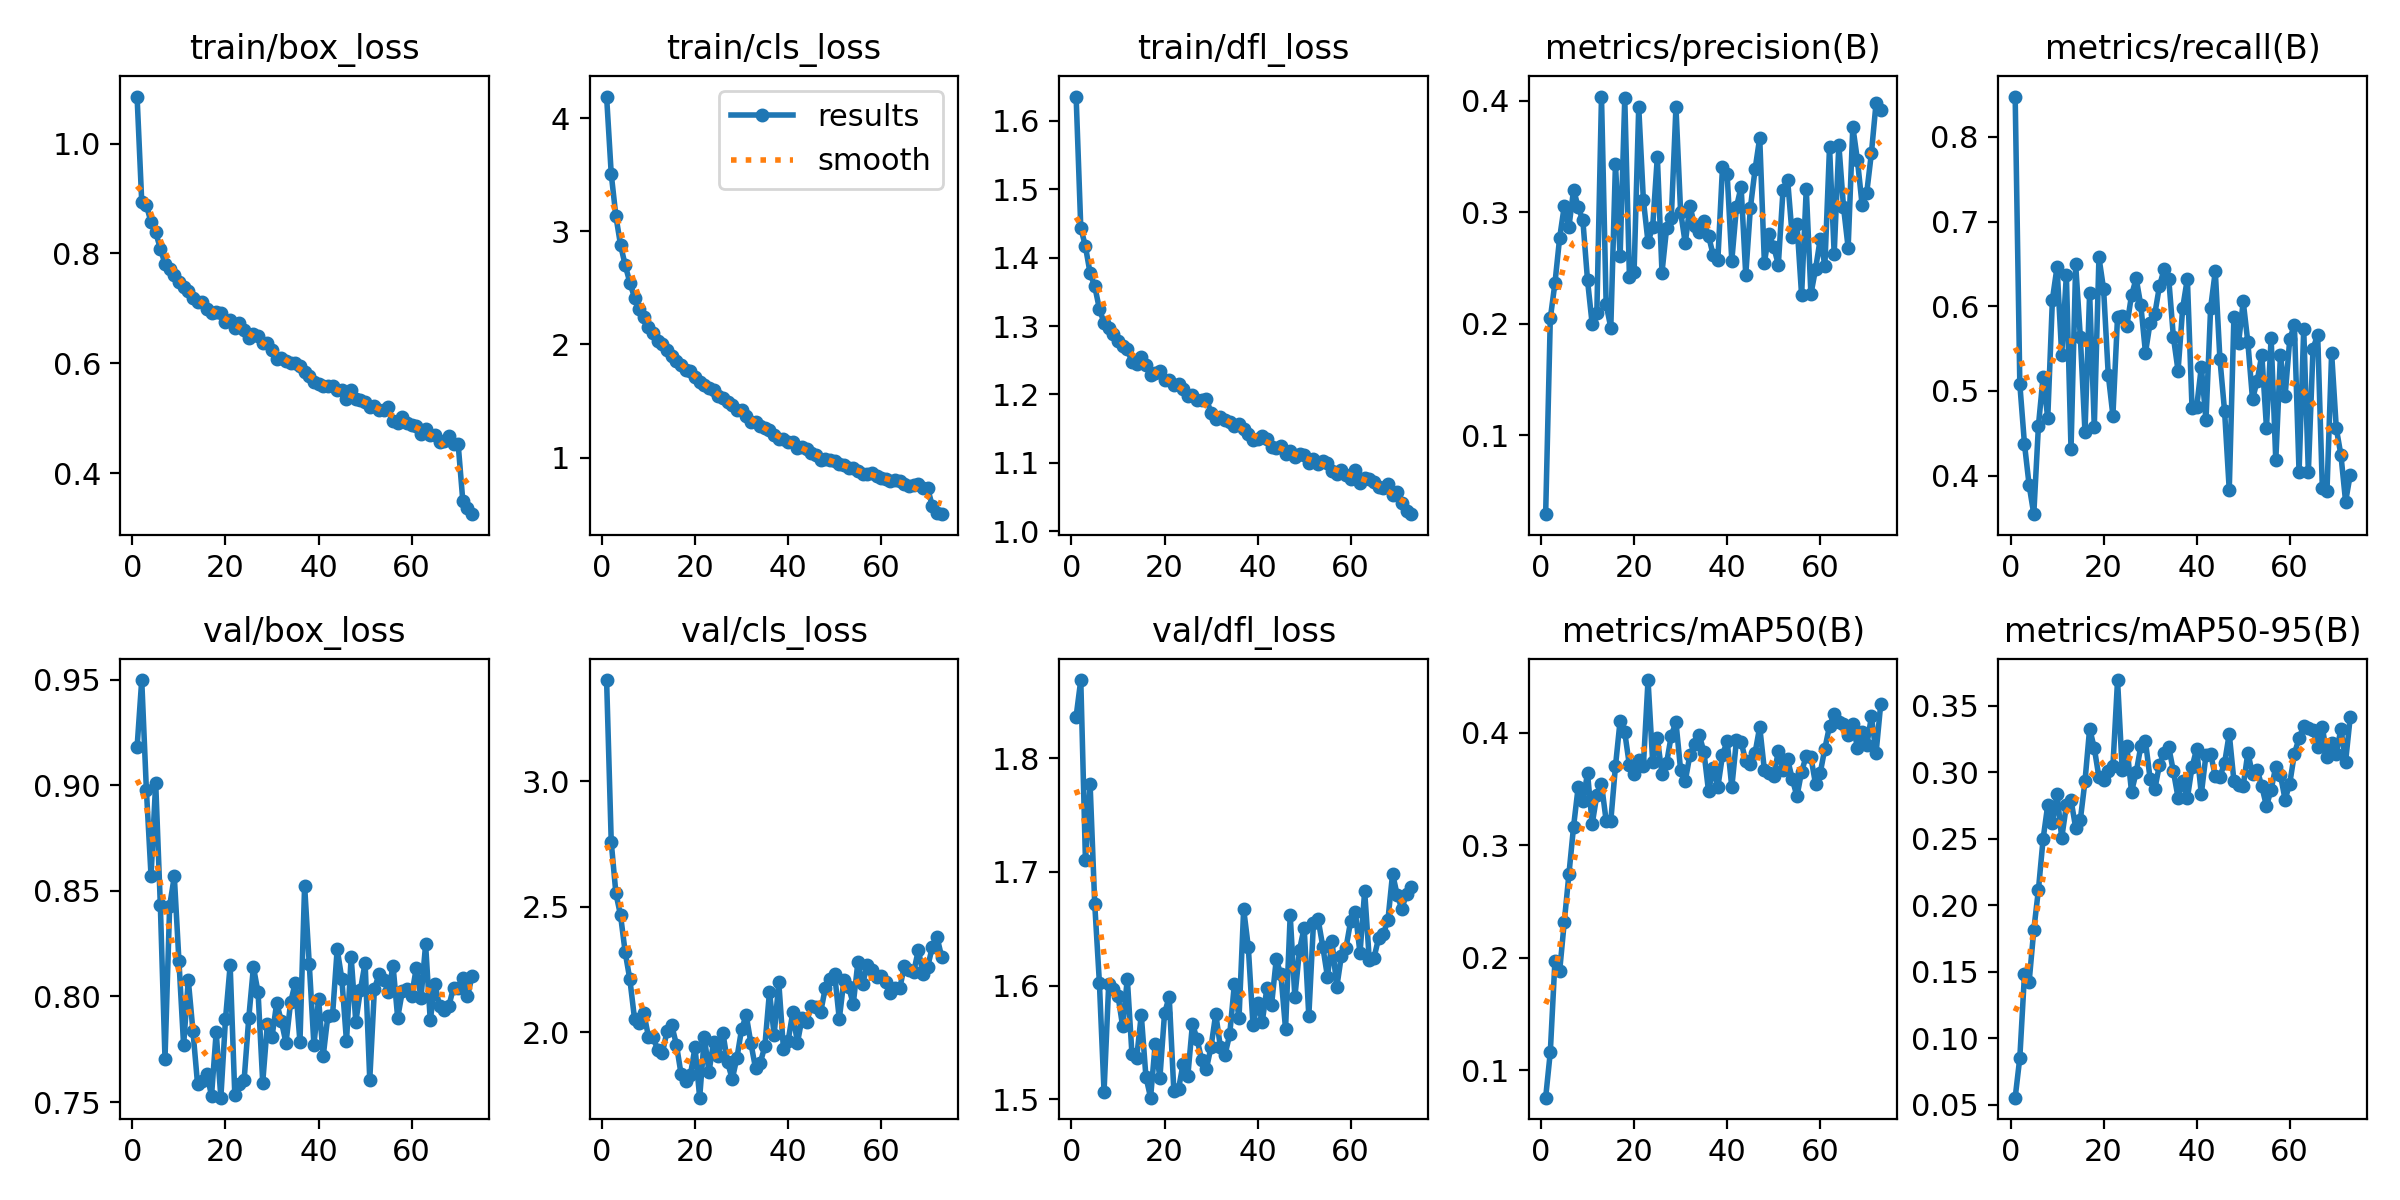

In [21]:
Image(filename=f'{HOME}/runs/detect/train2/results.png' , width=600)

In [23]:
!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data=/content/Gender_Age-2/data.yaml

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3011108 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/Gender_Age-2/valid/labels.cache... 199 images, 0 backgrounds, 0 corrupt: 100% 199/199 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 13/13 [00:04<00:00,  2.87it/s]
                   all        199        199      0.274      0.591      0.447      0.369
         Female Age- 1        199          3      0.298      0.667      0.775       0.62
         Female Age- 2        199          2          1          0      0.183      0.159
        Female Age- 22        199          9      0.199      0.556      0.375      0.278
        Female Age- 24        199          5      0.138        0.8      0.401      0.326
        Female Age- 25        199         10      0.222        0.4      0.239      0.195
        Female Age- 28        199         11   

In [24]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source=/content/Gender_Age-2/test/images

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3011108 parameters, 0 gradients, 8.1 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/129 /content/Gender_Age-2/test/images/1-1359-_jpg.rf.ac5322ca1002c2c5eba5ed7c5be30cd7.jpg: 640x640 1 Male Age- 22, 1 Male Age- 24, 10.8ms
image 2/129 /content/Gender_Age-2/test/images/1-30-_jpg.rf.65e822b627c35484f3440086a8f0941f.jpg: 640x640 1 Female Age- 28, 7.5ms
image 3/129 /content/Gender_Age-2/test/images/1_0_0_20161219191012803-jpg-chip_jpg.rf.664797103b35a637cc828b7ff97b1d44.jpg: 640x640 (no detections), 7.4ms
image 4/129 /content/Gender_Age-2/test/images/1_0_0_20161219193326339-jpg-chip_jpg.rf.aea0098a54e8db89050737350cfc8509.jpg: 640x640 1 Male Age- 1, 7.4ms
image 5/129 /content/Gender_Age-2/test/images/1_0_0_20161219205817093-jpg-chip_jpg.rf.058efdbd7d7dcbf4918c367d38124f43.jpg: 640x640 1 Male Age- 1, 7.4ms
image 6/129 /content/Gender_Age-2/test/images/22_0_0_2

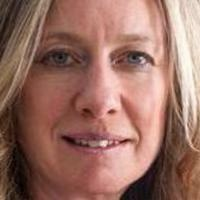

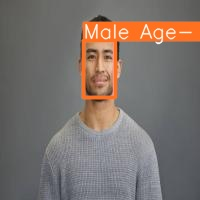

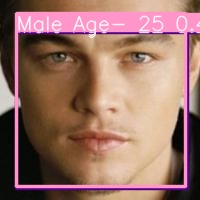

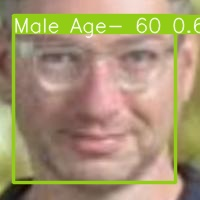

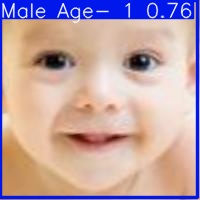

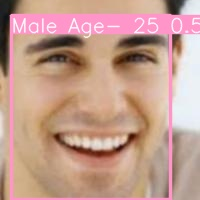

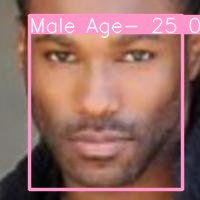

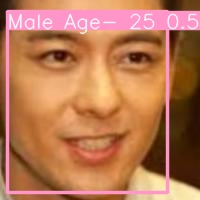

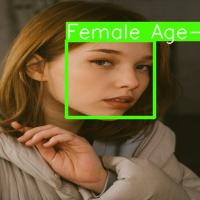

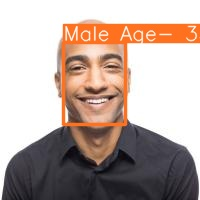

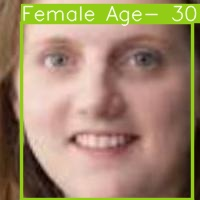

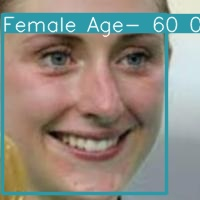

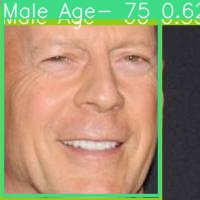

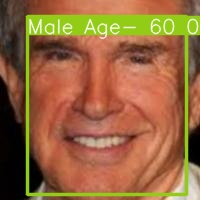

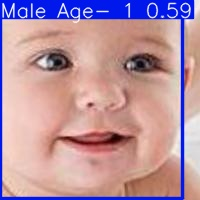

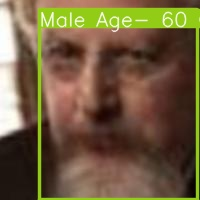

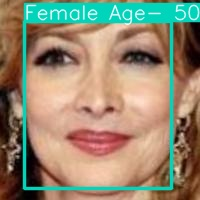

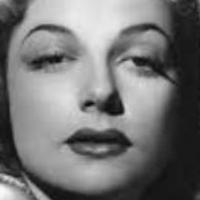

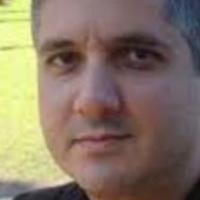

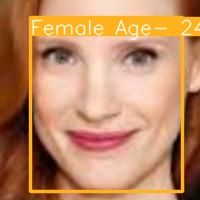

In [25]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:20]:
      display(Image(filename=image_path, width=600))
      print("\n")